In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
'''
Maximal Margin Classifier in 1-D with 2 classes:
find 2 points, one from each class, that are the closest together- these are your support vectors
find the mid-point between your support vectors - this is your margin
classify new data points by seeing which side of the line the data points fall on
'''
def MMC(dataX, labelY):
    '''
    Maximal Margin Classifier (MMC) for 1 dimensional data and 2 classes
    Params:
        dataX: list or vector of length L, where L is the number of data points
        dataY: list of vector of length L, where dataY[i] is the label for dataX[i].
    Return:
        threshold: int or double that represents the threshold for classification
        decision_function: a function that makes the MMC's classification; i.e. decision_function(dataX) ~= dataY
        trainAcc: training accuracy of decision_function
    '''
    # 1: find 2 points, one from each class, that are the closest together- these are your support vectors
    ## find "switching-points"; the points where the class changes from class1 to class2
    sorted_index = np.argsort(dataX)
    dataX = dataX[sorted_index] # sort in ascending order
    dataY = labelY[sorted_index] # and order the class labels accordingly
    
    switchpts = []
    pt1 = dataX[0]
    cl1 = dataY[0]
    for pt,cl in zip(dataX,dataY):
        if cl != cl1: # class changed
            switchpts.append( [pt1,pt,cl1,cl,abs(pt-pt1)] ) # last element is distance between switching points
            cl1 = cl
        pt1=pt
    # find switch pts where the distance is the greatest! these are our support vectors (sv)
    [sv1, sv2, lowerclass, higherclass,_] = sorted(switchpts,key=lambda list_elem:list_elem[-1],reverse=True)[0] # get max value with index 0
    # list_elem[-1] is the distance between switching points
    # lowerclass is the class label for sv1
    # find the mid-point between your support vectors - this is your margin
    threshold = (sv1+sv2)/2
    # classify new data points by seeing which side of the line the data points fall on
    decision_function = lambda datax: lowerclass if datax < threshold else higherclass
    
    # Accuracy
    num_correct = 0
    for pt,cl in zip(dataX,dataY):
        pred = decision_function(pt)
        if pred == cl:
            num_correct += 1
    trainAcc = num_correct / len(dataX)
    
    return threshold, decision_function, trainAcc

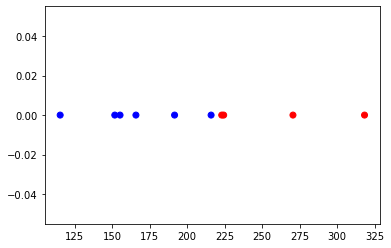

In [36]:
# Data: Classification of Obese vs. Not Obese
# generate 10 weight values between 110 and 340 lbs uniformly.
weights = np.random.uniform(low=110, high=340, size=10)
# weights above 220 are obsese, anythin below are not obese
class_labels = np.array(["Obese" if x > 220 else "Not Obese" for x in weights])
# Display weights and labels
plt.scatter(x=weights, y = np.zeros_like(weights), c = ['r' if lbl == "Obese" else 'b' for lbl in class_labels])
# plt.legend(handles=["Obese", "Not Obese"])
plt.show()

In [38]:
threshold, decision_function, trainAcc = MMC(weights,class_labels)
print(threshold," ",trainAcc)

219.43380845387495   1.0


In [39]:
decision_function(175)

'Not Obese'

In [41]:
# Let's now make a test dataset of 50 data points and see how the classifier does:
weights_test = np.random.uniform(low=110, high=340, size=50)
class_labels_test = np.array(["Obese" if x > 220 else "Not Obese" for x in weights_test])

num_correct = 0
for pt,cl in zip(weights_test,class_labels_test):
    pred = decision_function(pt)
    if pred == cl:
        num_correct += 1
testAcc = num_correct / len(class_labels_test)
print("Testing accuracy is ",testAcc)

Testing accuracy is  1.0


Since the data set followed a threshold-boundary decision rule & our training data sufficiently allowed us to discover this rule, we get 100% on training and testing accuracy. If the decision rule is not straightforward or if our training data contains outliers then the MMC will perform less.